<h1> Track emoji usage </h1>

In [214]:
from __future__ import division
import datetime
from pymongo import MongoClient
import pandas as pd
import numpy
import scipy
import matplotlib as mpl
import collections
%pylab inline
pylab.rcParams['figure.figsize'] = (8.0, 6.0) # set size of figures"
plt.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


In [9]:
client = MongoClient()
db = client.emoji_db
tweets = db.emoji_tweets
all_tweets = db.emoji_usage

In [352]:
all_tweets.find({"has_emoji":True}).count() / all_tweets.find({"has_emoji":False}).count()

0.18601293434667887

In [353]:
data=all_tweets.find()

In [187]:
x.values()

[u'ko',
 0,
 u'Eunsol Park',
 None,
 datetime.datetime(2016, 3, 31, 14, 24, 40),
 u'Seoul',
 None,
 False,
 datetime.datetime(2016, 3, 31, 14, 35, 35, 908000),
 ObjectId('56fd35b770de550f8d07b089'),
 u'sorr21',
 0]

In [354]:
#build pandas dataframe from mongo
df=pd.DataFrame([[x['date'],x['has_emoji']] for x in data], columns=['date','has_emoji'])
df=df.set_index('date')

In [135]:
df['day']=pd.DatetimeIndex(df['date']).day
df['hour']=pd.DatetimeIndex(df['date']).hour
df['min']=pd.DatetimeIndex(df['date']).minute

In [ ]:
plot((1+1/df.groupby(['day','hour'])['has_emoji'].mean().values)**-1)

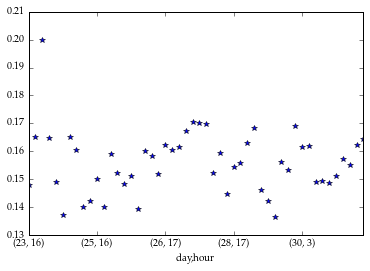

In [179]:
df.groupby(['day','hour'])['has_emoji'].mean().plot(marker='*',linestyle='none')

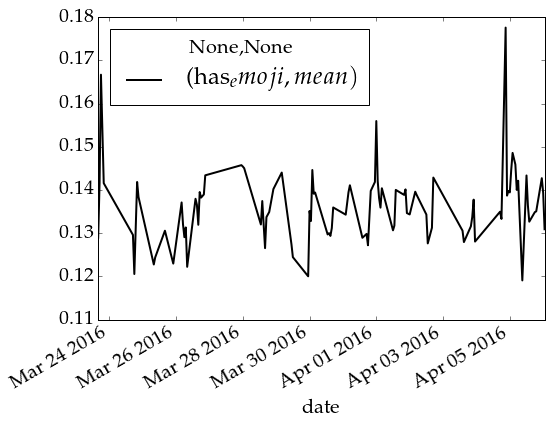

In [355]:
AO = (1+1/df.resample("H",how=['mean']))**-1 #calcuate emoji/all_tweets
AO=AO.dropna()
AO.plot(style='k-')

In [310]:
import json
def default(obj):
    """Default JSON serializer."""
    import calendar, datetime

    if isinstance(obj, datetime.datetime):
        if obj.utcoffset() is not None:
            obj = obj - obj.utcoffset()
        millis = int(
            calendar.timegm(obj.timetuple()) * 1000 +
            obj.microsecond / 1000
        )
        return millis
    raise TypeError('Not sure how to serialize %s' % (obj,))
    
#json.dumps(AO.index.tolist(), default=default)

In [357]:
from nvd3 import lineWithFocusChart
# Open File to write the D3 Graph
output_file = open('time-nvd3.html', 'w')

chart = lineWithFocusChart(name='lineWithFocusChart', x_is_date=True, x_axis_format="%d %b %Y")
xdata = [default(date) for date in AO.index]
ydata = AO.values.tolist()

extra_serie = {"tooltip": {"y_start": "", "y_end": " ext"},
               "date_format": "%d %b %Y"}
chart.add_serie(name="Serie 1", y=ydata, x=xdata, extra=extra_serie)
chart.buildhtml()

output_file.write(chart.htmlcontent)

# close Html file
output_file.close()

In [315]:
lineWithFocusChart?